In [33]:
from gensim.models import Word2Vec
import pandas as pd
import re
import numpy as np 
import nltk # for tokenizing the paragraphs in sentences and sentences in words
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
# bigger_list=[]
# for i in df['patterns']:
#     li = list(i.split(" "))
#     bigger_list.append(li)




[nltk_data] Downloading package punkt to
[nltk_data]     /home/architsangal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/architsangal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/architsangal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
train_df = pd.read_csv("train.csv")
train_df.drop(columns=["qid"],inplace=True)
total_y = train_df['target'].tolist()
sentences = train_df['question_text'].tolist()
vector_size = 150

In [9]:
i=0
sentences_in_list = []
for sentence in sentences:
    temp = re.sub('[^a-zA-Z]', ' ', sentence)
    temp = temp.lower()
    new_sentence = temp.split()
    sentences_in_list.append(new_sentence)
    new_sentence = ' '.join(new_sentence)
    sentences[i] = new_sentence
    i+=1

In [10]:
f=0
set_of_words = set(stopwords.words('english'))
i=0
for sentence in sentences_in_list:
    list_words_left = []
    for word in sentence:
        if(word in set_of_words):
            continue
        else:
            list_words_left.append(word)
    sentences_in_list[i] = list_words_left
    i+=1
    if i/len(sentences)*100 > f :
        # print(f)
        f+=1

In [11]:
model = Word2Vec(sentences_in_list,workers=8,min_count=1,vector_size=vector_size)

In [12]:
vectors_of_sentences = []
for sentence in sentences_in_list:
    vectors_of_sentence = []
    for word in sentence:
        try:
            vector = model.wv[word]
            vectors_of_sentence.append(vector)
        except:
            continue
    vectors_of_sentences.append(vectors_of_sentence)


In [13]:
sum = []
k=0
f=0
for i in vectors_of_sentences:
    final_vector = [0]*vector_size
    j=0

    for vector in i:
        final_vector = [a + b for a, b in zip(final_vector, list(vector))]
        j+=1
    
    if(j != 0):
        final_vector = [ i/j for i in final_vector]

    sum.append(final_vector)
    k+=1
    if k/len(sentences)*100 > f :
        print(f)
        f+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [14]:
df = pd.DataFrame(sum)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.125173,0.148830,-0.377775,-0.471785,-0.271556,-0.423128,-0.734839,0.063350,-0.386305,0.372330,...,-0.499286,0.228226,-0.070504,0.051677,-0.058609,-0.132868,0.032327,0.108723,0.325145,0.270169
1,-0.760824,0.004937,0.079711,0.159034,-0.623385,-0.517148,-0.191461,-0.037132,-0.601697,0.932013,...,0.011171,0.281666,-0.372281,0.687275,0.252621,0.351640,-0.618454,-0.276499,0.392565,-0.235780
2,-0.201314,0.295026,-0.338564,0.736514,-0.248719,-0.416360,-0.295105,0.410672,0.047086,-0.319433,...,0.226440,0.256878,-0.197057,0.324045,0.577712,-0.152834,-0.186376,-0.871695,0.429731,-0.203992
3,0.287638,-0.255861,-0.955254,-0.276125,0.507297,-0.713785,-0.792814,0.304605,0.512385,0.593509,...,0.395193,0.078521,-0.292274,-0.052589,0.707940,0.073170,0.241160,-0.376527,0.837106,-0.208183
4,0.110274,-0.468648,-0.711323,0.385441,0.000207,-0.125276,0.373834,0.493693,0.105543,-0.151489,...,0.421100,-0.273699,0.603266,0.416058,0.096052,0.026438,-0.191471,0.384894,0.748436,-0.659067


In [16]:
from sklearn.model_selection import train_test_split 

train_X1, test_X1, train_y1, test_y1 = train_test_split(df, total_y, train_size=0.6)


In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
lreg1 = LogisticRegression(solver='liblinear')
lreg1.fit(train_X1,train_y1)

LogisticRegression(solver='liblinear')

In [18]:
# Y1 = train_df['target'].to_numpy().astype(np.float64)
# Y1 = Y1[:N]

# data = []
# for i in range(N):
#   data.append([sentences[i],Y1[i]])

# import csv

# with open('processed_train_data.csv','w',newline='') as fp:
#   a = csv.writer(fp, delimiter=',')
#   a.writerows(data)

In [23]:
train_yhat1 = lreg1.predict_proba(train_X1)
test_yhat1 = lreg1.predict_proba(test_X1)

# print("training score = ", roc_auc_score(train_y1, train_yhat1[:,1]))
# print("test score = ", roc_auc_score(test_y1,test_yhat1[:,1]))

threshold = 0.125
max = 0
maxi = 0

for i in range(100):
    threshold += 0.001
    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    if(f1_score(test_y1, test_output1)>max):
        max = f1_score(test_y1, test_output1)
        maxi = threshold

In [24]:
print("training score = ", f1_score(train_y1, train_output1))
print("testing score = ", f1_score(test_y1, test_output1))

training score =  0.4490422662755674
testing score =  0.4549782653694887


In [25]:
print(max)
print(maxi)

0.4649342517219788
0.18300000000000005


In [26]:
threshold = 0.18300000000000005

train_output1 = (train_yhat1[:,1] > threshold).astype(int)
test_output1 = (test_yhat1[:,1] > threshold).astype(int)

print("training score = ", f1_score(train_y1, train_output1))
print("testing score = ", f1_score(test_y1, test_output1))

training score =  0.45880413086869737
testing score =  0.4649342517219788


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot the Confusion matrix
def confusion_matrix_for_data(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

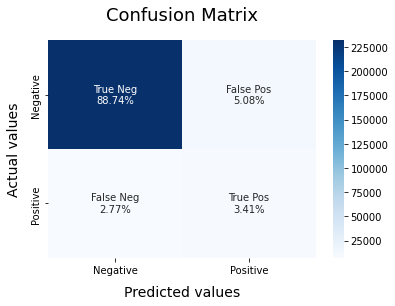

In [39]:
confusion_matrix_for_data(test_y1, test_output1)